In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# read data for analysis

In [8]:
data = pd.read_csv('1..+Zomato_resources/zomato.csv')

In [10]:
data.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [11]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [12]:
data.shape

(51717, 17)

In [15]:
# performing data preprocessing

In [19]:
data.duplicated().sum() #no duplicates

np.int64(0)

In [22]:
data.isna().sum() #null values detected

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [23]:
# clean null values

In [24]:
# delete row based on location column since it has few null values
data.dropna(subset=['location'], inplace=True)

In [26]:
df = data.copy()

In [28]:
df.location

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51696, dtype: object

In [29]:
# add details to the location in order to get more accurate coordinates (all locations are located in Bangalore, Karnataka, India)
df.location = df.location + ' , Bangalore, Karnataka, India'

In [30]:
df.location

0               Banashankari , Bangalore, Karnataka, India
1               Banashankari , Bangalore, Karnataka, India
2               Banashankari , Bangalore, Karnataka, India
3               Banashankari , Bangalore, Karnataka, India
4               Basavanagudi , Bangalore, Karnataka, India
                               ...                        
51712             Whitefield , Bangalore, Karnataka, India
51713             Whitefield , Bangalore, Karnataka, India
51714             Whitefield , Bangalore, Karnataka, India
51715    ITPL Main Road, Whitefield , Bangalore, Karnat...
51716    ITPL Main Road, Whitefield , Bangalore, Karnat...
Name: location, Length: 51696, dtype: object

In [31]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [32]:
# extract latitudes and longitudes from the data

In [33]:
locations = pd.DataFrame()

In [34]:
locations['Name'] = df.location.unique()

In [35]:
locations

,Name
0,"Banashankari , Bangalore, Karnataka, India"
1,"Basavanagudi , Bangalore, Karnataka, India"
2,"Mysore Road , Bangalore, Karnataka, India"
3,"Jayanagar , Bangalore, Karnataka, India"
4,"Kumaraswamy Layout , Bangalore, Karnataka, India"
...,...
88,"West Bangalore , Bangalore, Karnataka, India"
89,"Magadi Road , Bangalore, Karnataka, India"
90,"Yelahanka , Bangalore, Karnataka, India"
91,"Sahakara Nagar , Bangalore, Karnataka, India"


In [37]:
from geopy.geocoders import Nominatim

In [38]:
geolocator = Nominatim(user_agent='app', timeout=None)

In [57]:
lat, lon = [], []

In [58]:
for name in locations.Name:
    loc = geolocator.geocode(name)

    if loc is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(loc.latitude)
        lon.append(loc.longitude)

In [59]:
locations['lat'] = lat
locations['lon'] = lon

In [60]:
locations

,Name,lat,lon
0,"Banashankari , Bangalore, Karnataka, India",12.939333,77.553982
1,"Basavanagudi , Bangalore, Karnataka, India",12.941726,77.575502
2,"Mysore Road , Bangalore, Karnataka, India",12.956773,77.549481
3,"Jayanagar , Bangalore, Karnataka, India",12.939904,77.582638
4,"Kumaraswamy Layout , Bangalore, Karnataka, India",12.906768,77.559502
...,...,...,...
88,"West Bangalore , Bangalore, Karnataka, India",13.009476,77.553089
89,"Magadi Road , Bangalore, Karnataka, India",12.975653,77.555355
90,"Yelahanka , Bangalore, Karnataka, India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore, Karnataka, India",13.062147,77.580061


In [61]:
locations.isna().sum()

Name    0
lat     2
lon     2
dtype: int64

In [62]:
locations[locations.lat.isna()]

,Name,lat,lon
79,"Rammurthy Nagar , Bangalore, Karnataka, India",NaN,NaN
85,"Sadashiv Nagar , Bangalore, Karnataka, India",NaN,NaN


In [64]:
# fill this empty lat and lon manually
locations.lat[79] = 13.0163
locations.lon[79] = 77.6785

locations.lat[85] = 13.0068
locations.lon[85] = 77.5813

C:\Users\modern14\AppData\Local\Temp\ipykernel_20804\2163290157.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  locations.lat[79] = 13.0163
C:\Users\modern14\AppData\Local\Temp\ipykernel_20804\2163290157.py:2: SettingWithCopyWarning: 
A 

In [66]:
locations[locations.lat.isna()]

,Name,lat,lon


In [67]:
# where are most number of restaurants located in Bangalore

In [77]:
df.location.value_counts()[0:10]

location
BTM , Bangalore, Karnataka, India                      5124
HSR , Bangalore, Karnataka, India                      2523
Koramangala 5th Block , Bangalore, Karnataka, India    2504
JP Nagar , Bangalore, Karnataka, India                 2235
Whitefield , Bangalore, Karnataka, India               2144
Indiranagar , Bangalore, Karnataka, India              2083
Jayanagar , Bangalore, Karnataka, India                1926
Marathahalli , Bangalore, Karnataka, India             1846
Bannerghatta Road , Bangalore, Karnataka, India        1630
Bellandur , Bangalore, Karnataka, India                1286
Name: count, dtype: int64

<Axes: xlabel='location'>

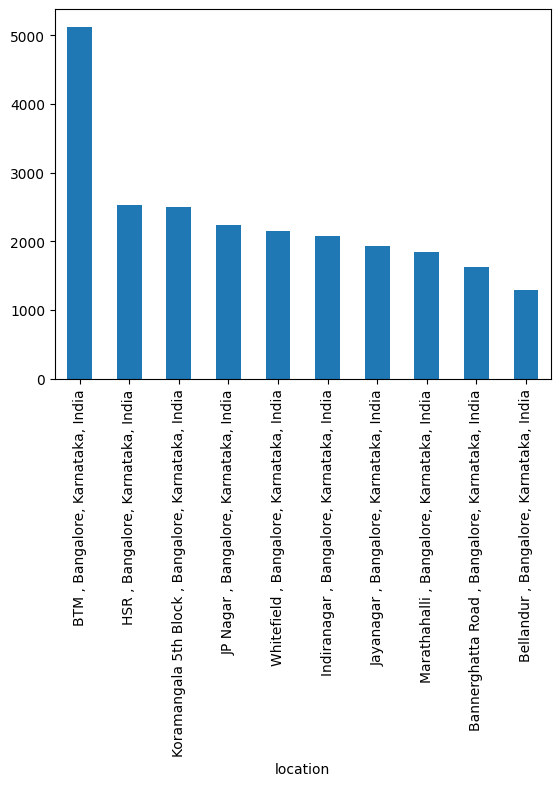

In [76]:
df.location.value_counts()[0:10].plot(kind='bar')

In [79]:
# visualize using heatmap

In [82]:
locations_count = df.location.value_counts().reset_index()
locations_count.columns = ['Name', 'count']

In [86]:
locations_merged = locations.merge(locations_count, on='Name')

In [88]:
import folium

In [89]:
def genereteBaseMap():
    basemap = folium.Map(location=[12.97, 77.59])
    return basemap

In [90]:
basemap = genereteBaseMap()

In [91]:
from folium.plugins import HeatMap

In [92]:
HeatMap(locations_merged[['lat', 'lon', 'count']]).add_to(basemap)

In [94]:
basemap #majority of restaurants are located in city center

In [95]:
# marker cluster analysis basemap

In [97]:
from folium.plugins import FastMarkerCluster

In [98]:
basemap = genereteBaseMap()

In [99]:
FastMarkerCluster(locations_merged[['lat', 'lon', 'count']]).add_to(basemap)

In [100]:
basemap

In [101]:
# plotting all the markers

In [103]:
m = genereteBaseMap()

In [105]:
for index, row in locations_merged.iterrows():
    folium.Marker(location=[row['lat'], row['lon']], popup=row['count']).add_to(m)

In [106]:
m

In [107]:
# data cleanin in rate column

In [108]:
df.rate

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51696, dtype: object

In [110]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [111]:
df.rate.isnull().sum()

np.int64(7754)

In [117]:
df.rate.isnull().sum()/len(df)*100 #14 percent of missing values from rate columns

np.float64(14.999226245744351)

In [118]:
df.dropna(subset='rate', inplace=True)

In [120]:
df.replace('NEW', '0', inplace=True)
df.replace('-', '0', inplace=True)

In [121]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '0', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [128]:
df['rating'] = df.rate.str.replace('/5', '').astype(float)

In [137]:
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                            object
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)     object
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
rating                         float64
dtype: object

In [138]:
df.rating.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '0', '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [139]:
# most highest rated restaurant

In [149]:
df.sort_values(by='rating', ascending=False)[['name', 'rating']][0:10]

,name,rating
21770,AB's - Absolute Barbecues,4.9
49627,Byg Brewski Brewing Company,4.9
38457,Belgian Waffle Factory,4.9
37843,Belgian Waffle Factory,4.9
49170,Byg Brewski Brewing Company,4.9
7888,Flechazo,4.9
51042,Flechazo,4.9
4944,Byg Brewski Brewing Company,4.9
11745,Belgian Waffle Factory,4.9
11504,Asia Kitchen By Mainland China,4.9


In [150]:
# location with best rating in average

In [167]:
df_rating = df.groupby('location').mean('rating').drop('votes', axis=1).reset_index().sort_values(by='rating', ascending=False)

In [173]:
df_rating.columns = ['Name', 'rating']

In [177]:
df_rating_merge = df_rating.merge(locations, on='Name')

In [175]:
basemap = genereteBaseMap()

In [180]:
df_rating

,Name,rating
50,"Lavelle Road , Bangalore, Karnataka, India",4.042886
80,"St. Marks Road , Bangalore, Karnataka, India",4.017201
42,"Koramangala 3rd Block , Bangalore, Karnataka, ...",3.978756
74,"Sankey Road , Bangalore, Karnataka, India",3.965385
12,"Church Street , Bangalore, Karnataka, India",3.963091
...,...,...
19,"Electronic City , Bangalore, Karnataka, India",3.041909
7,"Bommanahalli , Bangalore, Karnataka, India",2.926752
23,"Hebbal , Bangalore, Karnataka, India",2.880000
60,"North Bangalore , Bangalore, Karnataka, India",2.385714


In [178]:
HeatMap(df_rating_merge[['lat', 'lon', 'rating']]).add_to(basemap)

In [179]:
basemap